In [1]:
import pandas as pd
import sklearn as skl
import plotly
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import tensorflow as tf
import keras_tuner as kt
import psycopg2

In [2]:
gdpwb_df = pd.read_csv('../Resources/gdpwb.csv')

In [3]:
medals_df = pd.read_csv('../Resources/medals_cleaned.csv')

In [4]:
medals_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,country_name,country_code,country_3_letter_code
0,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,ES,ESP
1,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,ES,ESP
2,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,SM,SMR
3,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,SM,SMR
4,Shooting,tokyo-2020,Trap Mixed Team,Mixed,BRONZE,GameTeam,United States of America,US,USA


In [5]:
gdpwb_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [6]:
gdpwb_df = gdpwb_df.drop(['Indicator Name', 'Indicator Code'], 1)

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [7]:
gdpwb_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [8]:
gdpwb_df.dtypes

Country Name     object
Country Code     object
1960            float64
1961            float64
1962            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
Unnamed: 65     float64
Length: 64, dtype: object

In [9]:
#countrylist = []
#for country in gdpwb_df["Country Name"]:
   # if country not in clean_olympics_results["country_name"]:
        #countrylist.append(country)
#len(countrylist)


In [10]:
gdpwb_melt = gdpwb_df.melt(id_vars=['Country Name','Country Code'], 
             value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
                var_name='year',
                value_name='gdp')

In [11]:
gdpwb_melt.head()

,Country Name,Country Code,year,gdp
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,1.931311e+10
2,Afghanistan,AFG,1960,5.377778e+08
3,Africa Western and Central,AFW,1960,1.040428e+10
4,Angola,AGO,1960,NaN


In [12]:
gdpwb_df.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [13]:
pop_df = pd.read_csv('../Resources/population.csv', skiprows = 4)

In [14]:
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [15]:
pop_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [16]:
pop_df = pop_df.drop(['Indicator Name', 'Indicator Code'], 1)

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [17]:
pop_df.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [18]:
#gdpwb_df[gdpwb_df.isin(['United States'])].stack()


In [19]:
pop_melt = pop_df.melt(id_vars=['Country Name','Country Code'], 
             value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
                var_name='year',
                value_name='population')

In [20]:
gdp_pop_df = pd.merge(pop_melt, gdpwb_melt,
                        on=  ['Country Name','Country Code', 'year'],
                        how = 'left')
gdp_pop_df.head(100)

,Country Name,Country Code,year,population,gdp
0,Aruba,ABW,1960,54208.0,NaN
1,Africa Eastern and Southern,AFE,1960,130836765.0,1.931311e+10
2,Afghanistan,AFG,1960,8996967.0,5.377778e+08
3,Africa Western and Central,AFW,1960,96396419.0,1.040428e+10
4,Angola,AGO,1960,5454938.0,NaN
...,...,...,...,...,...
95,High income,HIC,1960,759783611.0,1.065825e+12
96,"Hong Kong SAR, China",HKG,1960,3075605.0,1.320797e+09
97,Honduras,HND,1960,2038636.0,3.356500e+08
98,Heavily indebted poor countries (HIPC),HPC,1960,161734348.0,1.741892e+10


In [21]:
hosts_df = pd.read_csv('../Resources/hosts_cleaned.csv')
hosts_df.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,tokyo-2020,2021-08-08,2021-07-23,Japan,Tokyo 2020,Summer,2020
1,pyeongchang-2018,2018-02-25,2018-02-08,Republic of Korea,PyeongChang 2018,Winter,2018
2,rio-2016,2016-08-21,2016-08-05,Brazil,Rio 2016,Summer,2016
3,sochi-2014,2014-02-23,2014-02-07,Russian Federation,Sochi 2014,Winter,2014
4,london-2012,2012-08-12,2012-07-27,Great Britain,London 2012,Summer,2012


In [22]:
#medals_gdp_pop = pd.merge(hosts_df, gdp_pop_df,
                        #left_on=  ['game_location'],
                        #right_on= ['Country Name'],
                        #how = 'left')
#gdp_merged_df.head()

In [23]:
olympics_results = pd.merge(hosts_df, medals_df,
                           left_on=  ['game_slug'],
                           right_on= ['slug_game'],
                           how = 'left')
olympics_results.head(10)
olympics_results.columns

Index(['game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year', 'discipline_title',
       'slug_game', 'event_title', 'event_gender', 'medal_type',
       'participant_type', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [24]:
clean_olympics_results= olympics_results.drop(['game_slug', 'game_end_date', 'game_start_date','game_name',  'slug_game', 'event_title', 'country_code'], 1)
clean_olympics_results.columns

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Index(['game_location', 'game_season', 'game_year', 'discipline_title',
       'event_gender', 'medal_type', 'participant_type', 'country_name',
       'country_3_letter_code'],
      dtype='object')

In [25]:
clean_olympics_results.dtypes

game_location            object
game_season              object
game_year                 int64
discipline_title         object
event_gender             object
medal_type               object
participant_type         object
country_name             object
country_3_letter_code    object
dtype: object

In [26]:
gdp_pop_df.year = gdp_pop_df.year.astype(int)

In [27]:
gdp_pop_df.dtypes

Country Name     object
Country Code     object
year              int32
population      float64
gdp             float64
dtype: object

In [28]:
olympic_wb = pd.merge(clean_olympics_results, gdp_pop_df,
                        left_on=  ['country_3_letter_code', 'game_year'],
                        right_on= ['Country Code', 'year'],
                        how = 'left')
olympic_wb.head()

,game_location,game_season,game_year,discipline_title,event_gender,medal_type,participant_type,country_name,country_3_letter_code,Country Name,Country Code,year,population,gdp
0,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,ESP,Spain,ESP,2020.0,47351567.0,1.281485e+12
1,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,ESP,Spain,ESP,2020.0,47351567.0,1.281485e+12
2,Japan,Summer,2020,Shooting,Mixed,SILVER,GameTeam,San Marino,SMR,San Marino,SMR,2020.0,33938.0,NaN
3,Japan,Summer,2020,Shooting,Mixed,SILVER,GameTeam,San Marino,SMR,San Marino,SMR,2020.0,33938.0,NaN
4,Japan,Summer,2020,Shooting,Mixed,BRONZE,GameTeam,United States of America,USA,United States,USA,2020.0,329484123.0,2.095303e+13


In [29]:
olympic_wb = olympic_wb.drop(['Country Name', 'Country Code', 'country_3_letter_code', 'year'], 1)

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [30]:
olympic_wb.columns

Index(['game_location', 'game_season', 'game_year', 'discipline_title',
       'event_gender', 'medal_type', 'participant_type', 'country_name',
       'population', 'gdp'],
      dtype='object')

In [31]:
#drop null values
olympic_wb.dropna(inplace=True)

In [32]:
olympic_wb.shape

(10775, 10)

In [33]:
#olympic_wb['gdp'] = olympic_wb.gdp.apply(lambda x: '%.1f' % x)

In [34]:
#olympic_wb.to_csv('olympic_wb.csv')

In [35]:
olympic_wb.head()

,game_location,game_season,game_year,discipline_title,event_gender,medal_type,participant_type,country_name,population,gdp
0,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,47351567.0,1.281485e+12
1,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,47351567.0,1.281485e+12
4,Japan,Summer,2020,Shooting,Mixed,BRONZE,GameTeam,United States of America,329484123.0,2.095303e+13
5,Japan,Summer,2020,Shooting,Mixed,BRONZE,GameTeam,United States of America,329484123.0,2.095303e+13
9,Japan,Summer,2020,Shooting,Men,BRONZE,Athlete,Serbia,6908224.0,5.333502e+10


In [36]:
olympic_wb.dtypes

game_location        object
game_season          object
game_year             int64
discipline_title     object
event_gender         object
medal_type           object
participant_type     object
country_name         object
population          float64
gdp                 float64
dtype: object

In [37]:
#olympic_wb= olympic_wb.replace([np.inf, -np.inf], np.nan)

In [38]:
findnan = olympic_wb.gdp.isnull()

In [39]:
findnan.value_counts()

False    10775
Name: gdp, dtype: int64

In [40]:
# condensing columns: game location and country name
olympic_wb["game_location"].replace({"Russian Federation": "Russia",
                        "Soviet Union": "Russia",
                        "Unified team": "Russia",
                        "West Germany": "Germany",
                        "East Germany": "Germany",
                        "German Democratic Republic (Germany)": "Germany",
                        "Federal Republic of Germany": "Germany",
                        "Australia, Sweden" : "Australia",
                        "USSR" : "Russia"}, inplace=True)

olympic_wb["country_name"].replace({"Russian Federation": "Russia",
                        "Soviet Union": "Russia",
                        "Unified team": "Russia",
                        "West Germany": "Germany",
                        "East Germany": "Germany",
                        "German Democratic Republic (Germany)": "Germany",
                        "Federal Republic of Germany": "Germany",
                        "Australia, Sweden" : "Australia",
                        "USSR" : "Russia"}, inplace=True)

In [41]:
# binning countries
country_counts = olympic_wb.country_name.value_counts()
country_counts.head(30)

United States of America      1926
People's Republic of China     790
Russia                         591
Great Britain                  583
Italy                          570
France                         555
Australia                      529
Japan                          495
Canada                         458
Republic of Korea              377
Norway                         371
Sweden                         297
Austria                        252
Cuba                           227
Finland                        205
Spain                          194
Brazil                         170
Hungary                        163
New Zealand                    158
Ukraine                        158
Romania                        149
Poland                         140
Kenya                          112
Belarus                        110
Czech Republic                 108
Kazakhstan                      80
Turkey                          79
Jamaica                         78
Belgium             

(0.0, 1600.0)

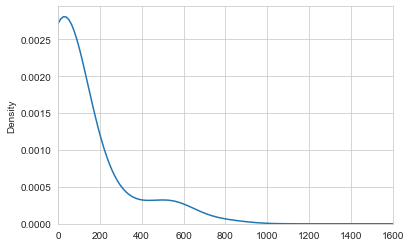

In [42]:
# checking density
sns.set_style('whitegrid')
gfg = sns.kdeplot(np.array(country_counts))
gfg.set_xlim(0, 1600)

In [43]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    olympic_wb.country_name = olympic_wb.country_name.replace(country,"Other")


# Check to make sure binning was successful
olympic_wb.country_name.value_counts()

United States of America      1926
Other                         1087
People's Republic of China     790
Russia                         591
Great Britain                  583
Italy                          570
France                         555
Australia                      529
Japan                          495
Canada                         458
Republic of Korea              377
Norway                         371
Sweden                         297
Austria                        252
Cuba                           227
Finland                        205
Spain                          194
Brazil                         170
Hungary                        163
Ukraine                        158
New Zealand                    158
Romania                        149
Poland                         140
Kenya                          112
Belarus                        110
Czech Republic                 108
Name: country_name, dtype: int64

In [44]:
location_counts = olympic_wb.game_location.value_counts()
location_counts

United States        1566
Japan                1348
China                 891
Great Britain         887
Brazil                879
Greece                835
Australia             832
Republic of Korea     614
Spain                 573
Canada                503
Italy                 431
Russia                379
Germany               272
Mexico                263
France                177
Norway                152
Austria               119
Yugoslavia             54
Name: game_location, dtype: int64

(0.0, 2000.0)

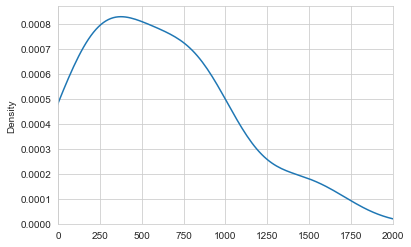

In [45]:
#checking density
sns.set_style('whitegrid')
gfg = sns.kdeplot(np.array(location_counts))
gfg.set_xlim(0, 2000)

In [46]:
# Determine which values to replace
replace_locations = list(country_counts[country_counts < 400].index)

# Replace in DataFrame
for country in replace_locations:
    olympic_wb.game_location = olympic_wb.game_location.replace(country,"Other")


# Check to make sure binning was successful
olympic_wb.game_location.value_counts()

Other            2600
United States    1566
Japan            1348
China             891
Great Britain     887
Greece            835
Australia         832
Canada            503
Italy             431
Russia            379
Germany           272
France            177
Yugoslavia         54
Name: game_location, dtype: int64

In [47]:
titles = olympic_wb.discipline_title.value_counts()
titles.head(30)

Athletics                    1369
Swimming                     1058
Wrestling                     565
Boxing                        506
Judo                          453
Rowing                        447
Sailing                       447
Gymnastics Artistic           374
Shooting                      374
Canoe Sprint                  367
Cross Country Skiing          350
Alpine Skiing                 293
Diving                        282
Fencing                       277
Weightlifting                 274
Cycling Track                 251
Speed skating                 233
Figure skating                175
Biathlon                      154
Taekwondo                     143
Tennis                        141
Short Track Speed Skating     138
Badminton                     130
Table Tennis                  125
Freestyle Skiing              120
Archery                       112
Canoe Slalom                   97
Snowboard                      96
Ski Jumping                    87
Cycling Road  

(0.0, 1500.0)

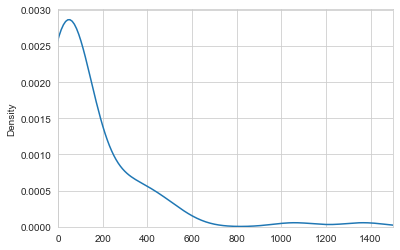

In [48]:
#checking density
sns.set_style('whitegrid')
gfg = sns.kdeplot(np.array(titles))
gfg.set_xlim(0, 1500)

In [49]:
# Determine which values to replace
title_replacements = list(titles[titles < 100].index)

# Replace in DataFrame
for discipline in title_replacements:
    olympic_wb.discipline_title = olympic_wb.discipline_title.replace(discipline,"Other")


# Check to make sure binning was successful
olympic_wb.discipline_title.value_counts()

Other                        1617
Athletics                    1369
Swimming                     1058
Wrestling                     565
Boxing                        506
Judo                          453
Rowing                        447
Sailing                       447
Shooting                      374
Gymnastics Artistic           374
Canoe Sprint                  367
Cross Country Skiing          350
Alpine Skiing                 293
Diving                        282
Fencing                       277
Weightlifting                 274
Cycling Track                 251
Speed skating                 233
Figure skating                175
Biathlon                      154
Taekwondo                     143
Tennis                        141
Short Track Speed Skating     138
Badminton                     130
Table Tennis                  125
Freestyle Skiing              120
Archery                       112
Name: discipline_title, dtype: int64

In [50]:
# Generate our categorical variable list
olympics_cat = olympic_wb.dtypes[olympic_wb.dtypes == "object"].index.tolist()

In [51]:
# Check the number of unique values in each column
olympic_wb[olympics_cat].nunique()

game_location       13
game_season          2
discipline_title    27
event_gender         4
medal_type           3
participant_type     2
country_name        26
dtype: int64

In [52]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(olympic_wb[olympics_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(olympics_cat)
encode_df.head()

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,game_location_Australia,game_location_Canada,game_location_China,game_location_France,game_location_Germany,game_location_Great Britain,game_location_Greece,game_location_Italy,game_location_Japan,game_location_Other,...,country_name_Other,country_name_People's Republic of China,country_name_Poland,country_name_Republic of Korea,country_name_Romania,country_name_Russia,country_name_Spain,country_name_Sweden,country_name_Ukraine,country_name_United States of America
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
encode_df.columns

Index(['game_location_Australia', 'game_location_Canada',
       'game_location_China', 'game_location_France', 'game_location_Germany',
       'game_location_Great Britain', 'game_location_Greece',
       'game_location_Italy', 'game_location_Japan', 'game_location_Other',
       'game_location_Russia', 'game_location_United States',
       'game_location_Yugoslavia', 'game_season_Summer', 'game_season_Winter',
       'discipline_title_Alpine Skiing', 'discipline_title_Archery',
       'discipline_title_Athletics', 'discipline_title_Badminton',
       'discipline_title_Biathlon', 'discipline_title_Boxing',
       'discipline_title_Canoe Sprint',
       'discipline_title_Cross Country Skiing',
       'discipline_title_Cycling Track', 'discipline_title_Diving',
       'discipline_title_Fencing', 'discipline_title_Figure skating',
       'discipline_title_Freestyle Skiing',
       'discipline_title_Gymnastics Artistic', 'discipline_title_Judo',
       'discipline_title_Other', 'disciplin

In [54]:
# Merge one-hot encoded features and drop the originals
olympic_wb = olympic_wb.merge(encode_df,left_index=True, right_index=True)
olympic_wb = olympic_wb.drop(olympics_cat,1)
olympic_wb.head()

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,game_year,population,gdp,game_location_Australia,game_location_Canada,game_location_China,game_location_France,game_location_Germany,game_location_Great Britain,game_location_Greece,...,country_name_Other,country_name_People's Republic of China,country_name_Poland,country_name_Republic of Korea,country_name_Romania,country_name_Russia,country_name_Spain,country_name_Sweden,country_name_Ukraine,country_name_United States of America
0,2020,47351567.0,1.281485e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2020,47351567.0,1.281485e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2020,329484123.0,2.095303e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020,329484123.0,2.095303e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2020,6908224.0,5.333502e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# splitting 

y = olympic_wb["medal_type_BRONZE"]
X = olympic_wb.drop(['medal_type_BRONZE', 'medal_type_GOLD',
       'medal_type_SILVER'],1)
# Reshape y to vertical
#y = y.reshape(-1,1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [56]:
X

,game_year,population,gdp,game_location_Australia,game_location_Canada,game_location_China,game_location_France,game_location_Germany,game_location_Great Britain,game_location_Greece,...,country_name_Other,country_name_People's Republic of China,country_name_Poland,country_name_Republic of Korea,country_name_Romania,country_name_Russia,country_name_Spain,country_name_Sweden,country_name_Ukraine,country_name_United States of America
0,2020,47351567.0,1.281485e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2020,47351567.0,1.281485e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2020,329484123.0,2.095303e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020,329484123.0,2.095303e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2020,6908224.0,5.333502e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10763,1988,57627106.0,1.018847e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10767,1988,122578000.0,3.071683e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10768,1988,244499000.0,5.236438e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10770,1988,244499000.0,5.236438e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
X_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

Text(0.5, 1.1, 'Bronze Medal Confusion Matrix')

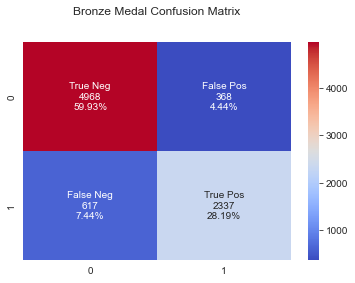

In [59]:
pipeline= Pipeline([
   ('scaler',StandardScaler()),
    ('pca', PCA()),
  # ('clf',RandomForestClassifier(n_estimators=5,max_depth=1,min_samples_leaf=3, max_features=6, random_state=42))

     ('clf',RandomForestClassifier(n_estimators=120, random_state=42))
])
pipeline.fit(X_train,y_train)

#Predicting y for X_val
y_pred = pipeline.predict(X)
cm = confusion_matrix(y,y_pred)
#sns.heatmap(cm/np.sum(cm), annot=True, 
            #fmt='.2%', cmap='coolwarm')

group_names = ['True Neg', 'False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,
            cmap='coolwarm', fmt='')
plt.title('Bronze Medal Confusion Matrix', y=1.1)

In [60]:
plt.savefig('Gold_Medal_Confusion_Matrix.png')

<Figure size 432x288 with 0 Axes>

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      5336
         1.0       0.86      0.79      0.83      2954

    accuracy                           0.88      8290
   macro avg       0.88      0.86      0.87      8290
weighted avg       0.88      0.88      0.88      8290



In [62]:
#pipeline.steps[1][1].get_feature_names_
X.columns

Index(['game_year', 'population', 'gdp', 'game_location_Australia',
       'game_location_Canada', 'game_location_China', 'game_location_France',
       'game_location_Germany', 'game_location_Great Britain',
       'game_location_Greece', 'game_location_Italy', 'game_location_Japan',
       'game_location_Other', 'game_location_Russia',
       'game_location_United States', 'game_location_Yugoslavia',
       'game_season_Summer', 'game_season_Winter',
       'discipline_title_Alpine Skiing', 'discipline_title_Archery',
       'discipline_title_Athletics', 'discipline_title_Badminton',
       'discipline_title_Biathlon', 'discipline_title_Boxing',
       'discipline_title_Canoe Sprint',
       'discipline_title_Cross Country Skiing',
       'discipline_title_Cycling Track', 'discipline_title_Diving',
       'discipline_title_Fencing', 'discipline_title_Figure skating',
       'discipline_title_Freestyle Skiing',
       'discipline_title_Gymnastics Artistic', 'discipline_title_Judo',
  

In [63]:
pipeline.steps

[('scaler', StandardScaler()),
 ('pca', PCA()),
 ('clf', RandomForestClassifier(n_estimators=120, random_state=42))]

In [64]:
sorted(zip(pipeline["clf"].feature_importances_, X.columns), reverse=True)
for feature_importance, feature in sorted(zip(pipeline["clf"].feature_importances_, X.columns), reverse=True):
    print(f"{feature}: {feature_importance}")

game_location_Italy: 0.018245360751127274
event_gender_Women: 0.016390494091146
game_location_Australia: 0.016006292883873306
country_name_Republic of Korea: 0.015956576993135275
country_name_People's Republic of China: 0.01587587185472626
country_name_Czech Republic: 0.01570914898653337
country_name_Kenya: 0.015566810526644388
country_name_New Zealand: 0.01552154226546219
country_name_Cuba: 0.015456259555573473
event_gender_Mixed: 0.015347349064450856
country_name_France: 0.015235118992055442
country_name_Canada: 0.015166721569666987
discipline_title_Rowing: 0.015157008997602306
country_name_Norway: 0.015060837228998718
population: 0.015001165517001907
discipline_title_Athletics: 0.014966541149007747
country_name_Poland: 0.014939975062614567
game_location_Canada: 0.01493640489346389
event_gender_Open: 0.01475945442364052
country_name_Other: 0.014728041695900597
game_location_China: 0.01468690742455053
country_name_Great Britain: 0.014680238307406163
game_location_Japan: 0.014523820120

In [65]:
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

chosen_tree=pipeline['clf']

In [66]:
# RandomForest classifier
parameter_grid={'n_estimators':[120],'max_depth':[120],'min_samples_leaf': 
[1,2,4],'max_features':[1,2,3,4,5,6,7,8]}

number_models=4
random_RandomForest_class=RandomizedSearchCV(
estimator=pipeline['clf'],
param_distributions=parameter_grid,
n_iter=number_models,
scoring='accuracy',
n_jobs=2,
cv=4,
refit=True,
return_train_score=True)

random_RandomForest_class.fit(X_train,y_train.ravel())
predictions=random_RandomForest_class.predict(X)

print("Accuracy Score",accuracy_score(y,predictions));
print("Best params",random_RandomForest_class.best_params_)
print("Best score",random_RandomForest_class.best_score_)

Accuracy Score 0.6440289505428227
Best params {'n_estimators': 120, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 120}
Best score 0.6408234946016297


Principle component analysis show the importance of each feature


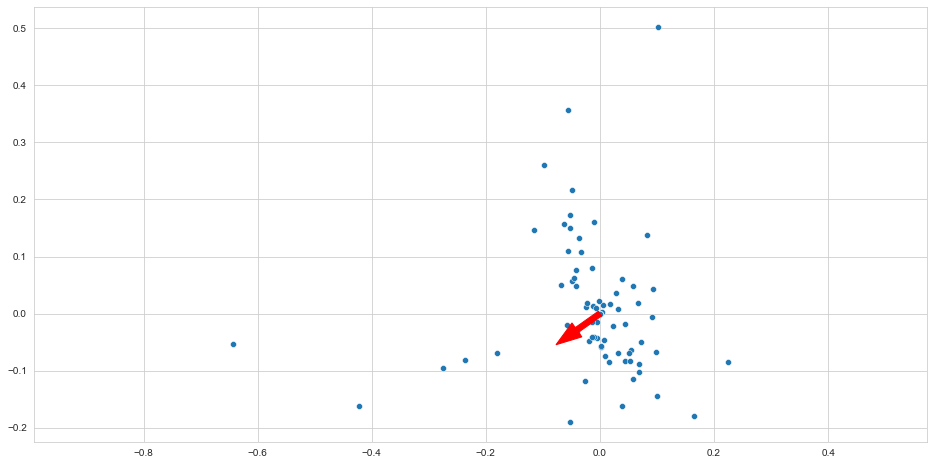

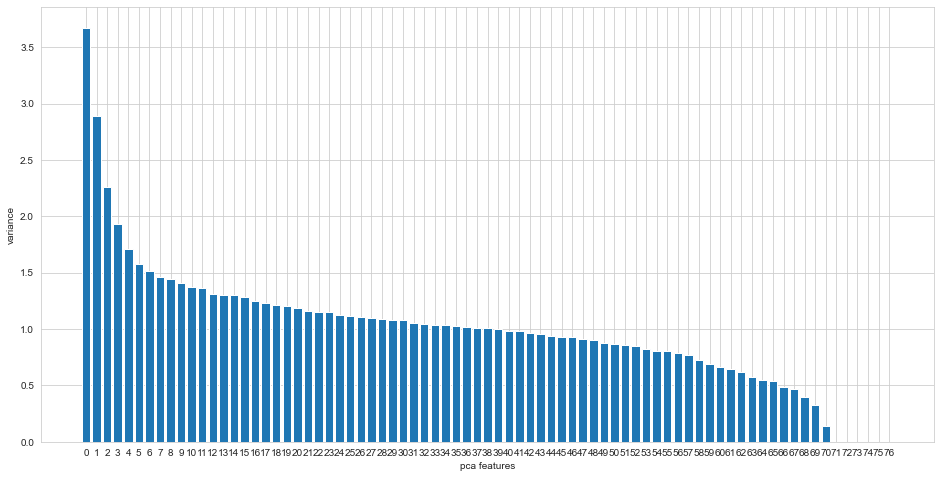

In [67]:
print('Principle component analysis show the importance of each feature')
pca=pipeline['pca']
pca_features=pca.components_
xs = pca_features[:,0]

fig,ax = plt.subplots(figsize=(16,8))
# Assign 1st column of pca_features: ys
ys = pca_features[:,1]
# Scatter plot xs vs ys
sns.scatterplot(x=xs, y=ys)

mean = pca.mean_
first_pc = pca.components_[0,:]
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0],mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.axis('equal')
plt.show()

fig,ax = plt.subplots(figsize=(16,8))
features = range(pca.n_components_)
ax.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('pca features')
plt.show()